In [1]:
from module.ms_module import MS
from preprocess.ms_preprocess import MSIPreprocessor
from module.ms_data_manager_imzml import MSDataManagerImzML
from tools.plot import plot_spectrum
from logger import get_logger

logger = get_logger("example")


INFO:     25-11-11 20:30 103 ms_data_manager_imzml - Extracting metadata...
INFO:     25-11-11 20:30 114 ms_data_manager_imzml - Metadata extraction completed.
INFO:     25-11-11 20:30 80 ms_data_manager_imzml - Loading data from data/example.imzML...
INFO:     25-11-11 20:30 202 ms_data_manager - creating ms mask.
INFO:     25-11-11 20:30 23 tools.plot - Plotting spectrum with plot_mode=line, mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


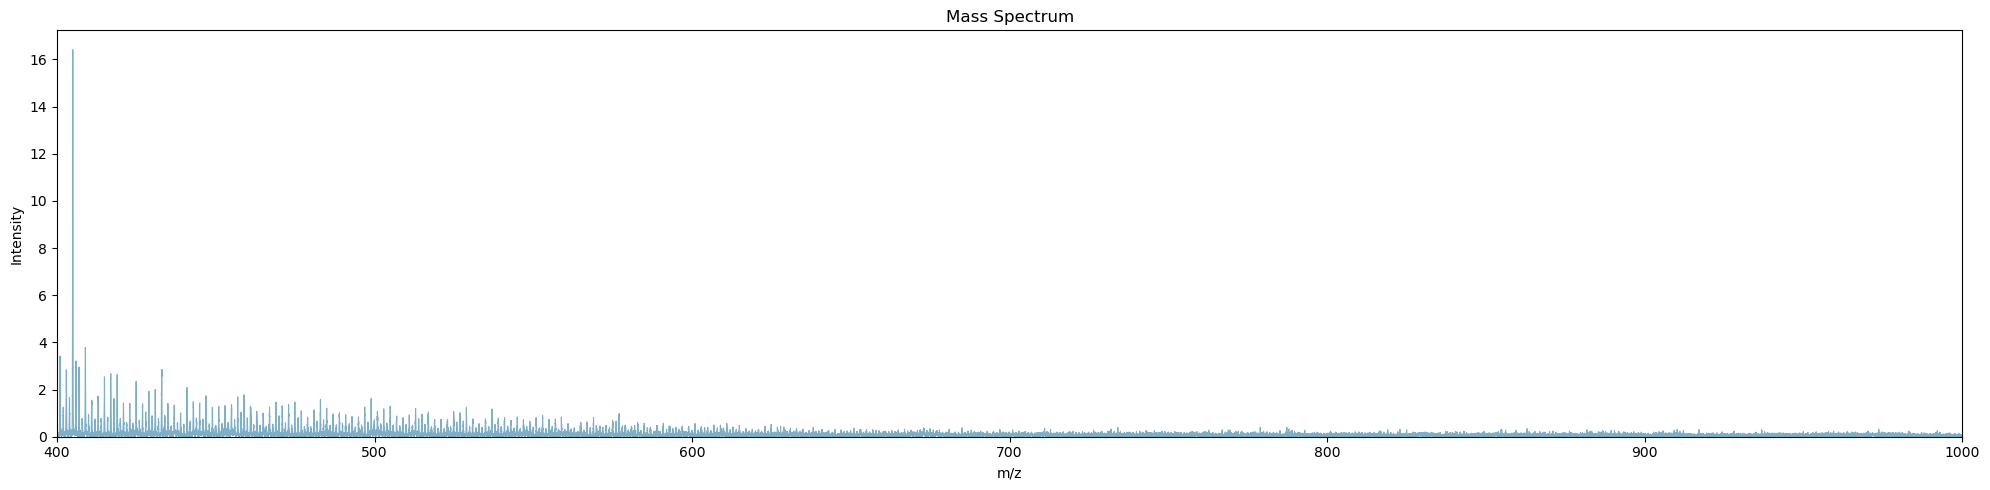

In [4]:
# Run examples when executing this file directly
if __name__ == "__main__":
    FILE_PATH = "data/example.imzML"
    ms = MS()
    ms_md = MSDataManagerImzML(ms, filepath=FILE_PATH)
    ms_md.load_full_data_from_file()
    sp = ms[0]

    denoised = MSIPreprocessor.noise_reduction(
        data=sp,
        method="savgol",
        window=5,
        polyorder=2
    )
    plot_spectrum(denoised)

INFO:     25-11-11 20:11 23 tools.plot - Plotting spectrum with plot_mode=line, mz_range=(500.0, 505.0), intensity_range=(0, 1.2), metrics_box=True, title_suffix=savgol, overlay=False
INFO:     25-11-11 20:11 105 tools.plot - Range: 500.0000 - 504.9928
                                          Correlation: 0.9920
                                          TIC ratio: 1.000
                                          SNR orig: 27.3
                                          SNR den: 49.7
                                          SNR improvement: 1.82x


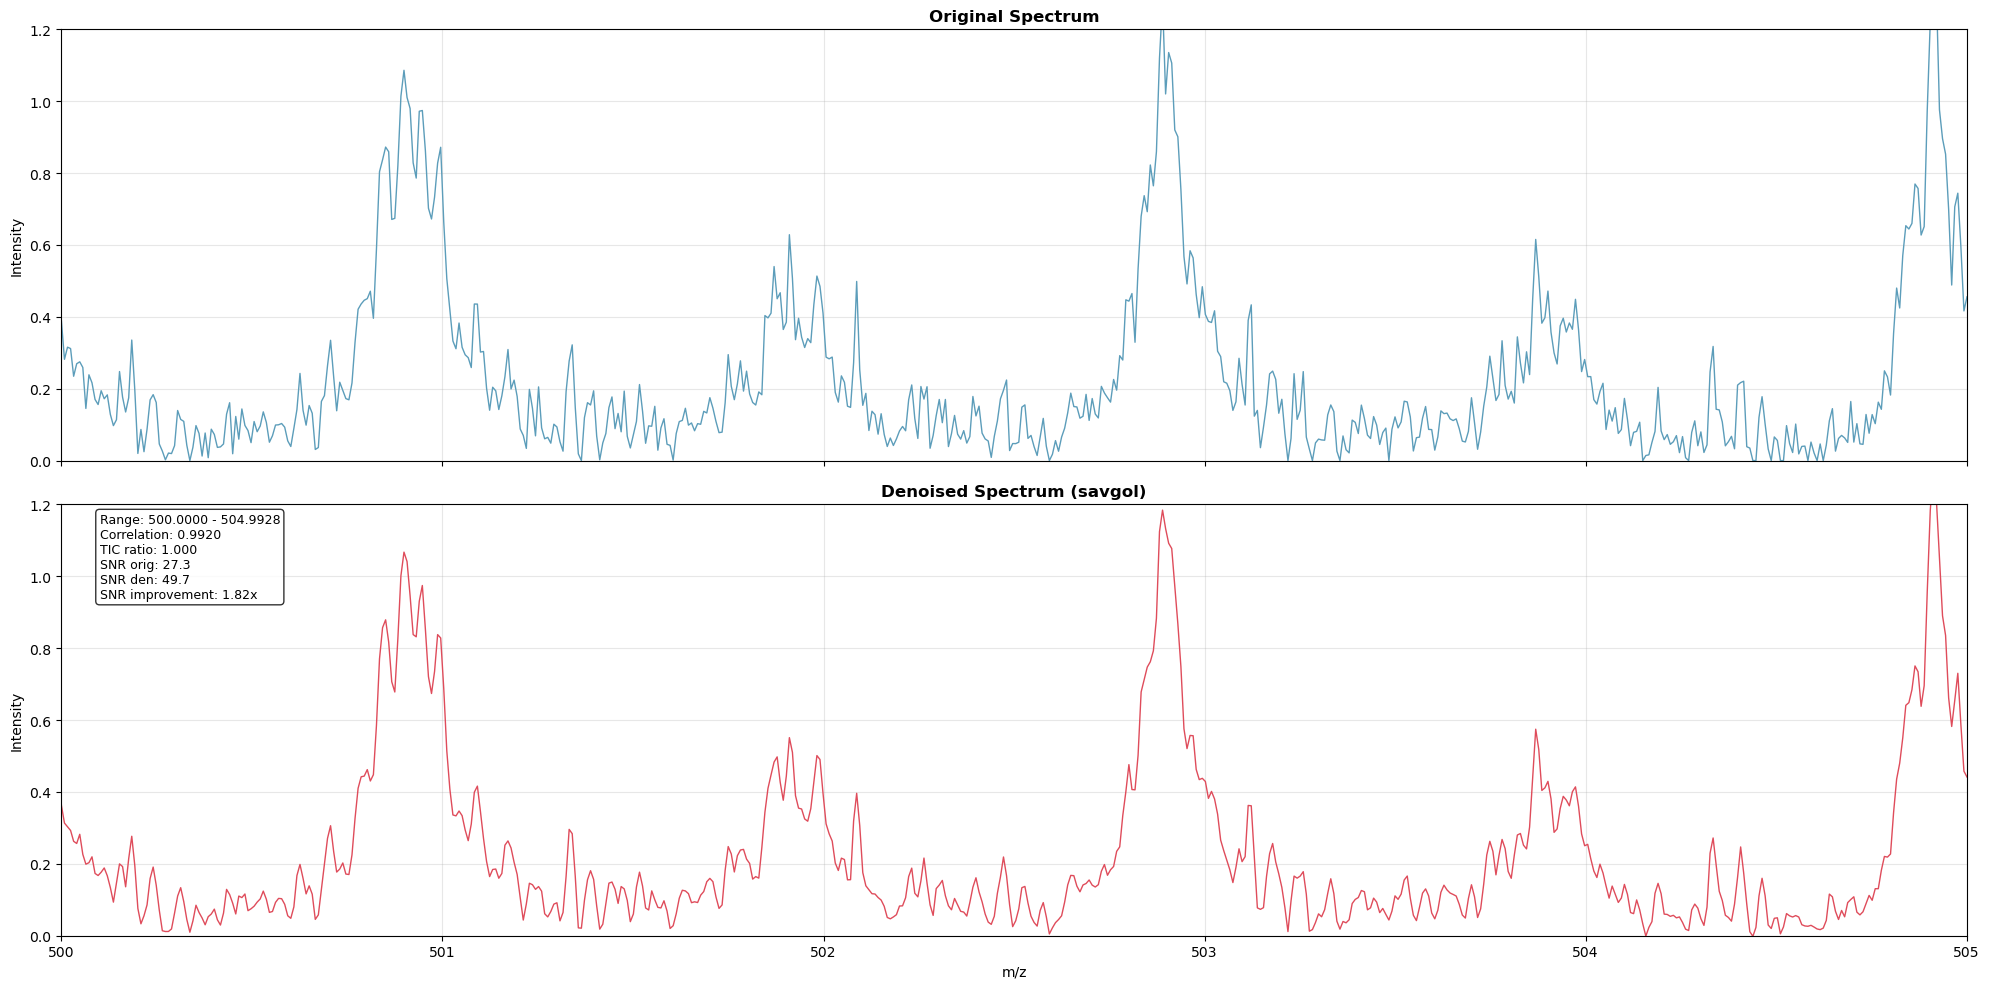

In [3]:
# Plotting
plot_spectrum(
    base=sp,
    target=denoised,
    mz_range=(500.0, 505.0),
    intensity_range=(0, 1.2),
    title_suffix='savgol',
    overlay=False,
)